In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from Data import *
from LDNN import plotpred, accuracy
from sklearn.metrics import mean_squared_error

2023-12-10 08:02:08.279425: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Importing data

In [2]:
X_train, X_test, y_train, y_test = load_dataLDP("K1_mi10_LDP.csv", "MinMax" ,False)

X features: 
   Erm/Sci  Scm/Po   X*
0    22.95     0.1 -2.4
1    22.95     0.1 -2.2
2    22.95     0.1 -2.0
3    22.95     0.1 -1.8
4    22.95     0.1 -1.6
Y features: 
     strain
0  0.818134
1  0.999271
2  1.220512
3  1.490737
4  1.820791


In [3]:
m = X_train.shape[0]

## 2 layer model

In [5]:
# Build the neural network model
model2l = keras.Sequential([
    layers.Dense(6, activation='relu', input_shape=(3,)),
    layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model2l.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model2l.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

2023-12-10 05:05:04.204765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
86/86 [==============================] - 3s 6ms/step - loss: 138.8316
Epoch 2/100
86/86 [==============================] - 1s 7ms/step - loss: 133.4553
Epoch 3/100
86/86 [==============================] - 1s 8ms/step - loss: 126.8312
Epoch 4/100
86/86 [==============================] - 1s 8ms/step - loss: 120.6705
Epoch 5/100
86/86 [==============================] - 1s 6ms/step - loss: 114.9607
Epoch 6/100
86/86 [==============================] - 1s 9ms/step - loss: 109.2966
Epoch 7/100
86/86 [==============================] - 1s 13ms/step - loss: 103.6997
Epoch 8/100
86/86 [==============================] - 1s 12ms/step - loss: 98.2228
Epoch 9/100
86/86 [==============================] - 1s 13ms/step - loss: 93.0281
Epoch 10/100
86/86 [==============================] - 2s 22ms/step - loss: 88.1557
Epoch 11/100
86/86 [==============================] - 1s 16ms/step - loss: 83.6414
Epoch 12/100
86/86 [==============================] - 1s 14ms/step - loss: 79.4289
Epoch 13/100

86/86 [==============================] - 1s 4ms/step


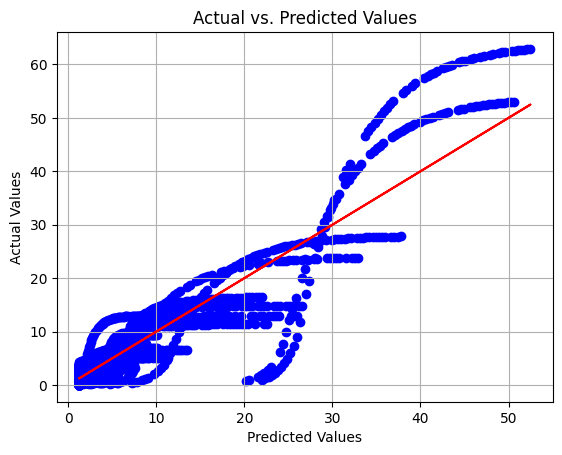

MSE for 2 layer model: 13.104795619386255
Accuracy for 2 layer model: 4.553734061930783


In [6]:
pred_train2l = model2l.predict(X_train)
plotpred(pred_train2l, y_train)
mse2l = np.mean((y_train - pred_train2l) ** 2)
print("MSE for 2 layer model:", mse2l)
print("Accuracy for 2 layer model:", accuracy(pred_train2l, y_train, 0.05))

22/22 [==============================] - 0s 5ms/step


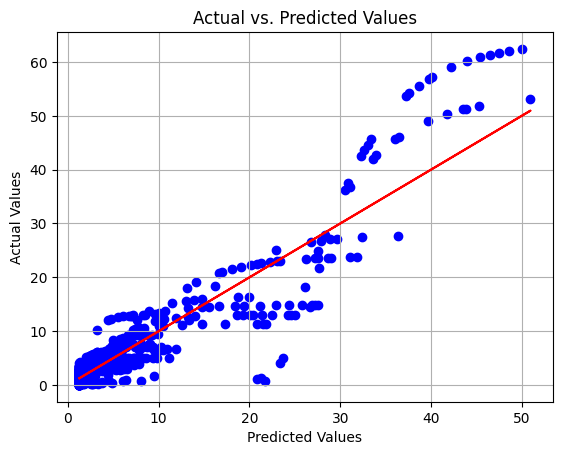

MSE for 2 layer model test set: 15.541612772666337
Accuracy for 2 layer model test set: 4.512372634643377


In [7]:
pred_test2l = model2l.predict(X_test)
plotpred(pred_test2l, y_test)
mse2l = np.mean((y_test - pred_test2l) ** 2)
print("MSE for 2 layer model test set:", mse2l)
print("Accuracy for 2 layer model test set:", accuracy(pred_test2l, y_test, 0.05))

## 4 Layer model

In [8]:
# Build the neural network model
model4l = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(3,)),
    layers.Dense(5, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model4l.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model4l.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

Epoch 1/100
86/86 [==============================] - 3s 5ms/step - loss: 140.1242
Epoch 2/100
86/86 [==============================] - 1s 6ms/step - loss: 130.2235
Epoch 3/100
86/86 [==============================] - 1s 6ms/step - loss: 117.6584
Epoch 4/100
86/86 [==============================] - 1s 13ms/step - loss: 110.0899
Epoch 5/100
86/86 [==============================] - 1s 6ms/step - loss: 104.1111
Epoch 6/100
86/86 [==============================] - 1s 6ms/step - loss: 96.3239
Epoch 7/100
86/86 [==============================] - 1s 6ms/step - loss: 87.1252
Epoch 8/100
86/86 [==============================] - 1s 9ms/step - loss: 76.9929
Epoch 9/100
86/86 [==============================] - 1s 7ms/step - loss: 66.2711
Epoch 10/100
86/86 [==============================] - 1s 6ms/step - loss: 56.1767
Epoch 11/100
86/86 [==============================] - 1s 7ms/step - loss: 47.0275
Epoch 12/100
86/86 [==============================] - 1s 7ms/step - loss: 39.4177
Epoch 13/100
86/86 

### Prediction for 4 layer model

86/86 [==============================] - 1s 5ms/step


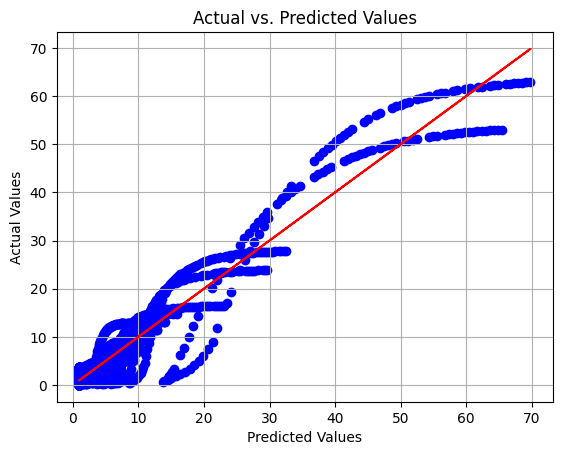

MSE for 2 layer model test set: 6.5877608206308125
6.994535519125683


In [9]:
pred_train4l = model4l.predict(X_train)
plotpred(pred_train4l, y_train)
mse4l = np.mean((y_train - pred_train4l) ** 2)
print("MSE for 2 layer model test set:", mse4l)
print(accuracy(pred_train4l, y_train))

22/22 [==============================] - 0s 5ms/step


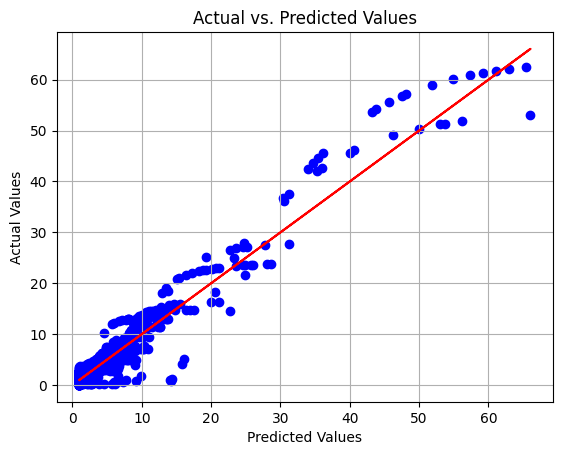

MSE for 2 layer model test set: 6.474857681689975
7.132459970887918


In [10]:
pred_test4l = model4l.predict(X_test)
plotpred(pred_test4l, y_test)
mse4lt = np.mean((y_test - pred_test4l) ** 2)
print("MSE for 2 layer model test set:", mse4lt)
print(accuracy(pred_test4l, y_test))

## 4 Layer model with tanh

In [11]:
# Build the neural network model
model4tanh = keras.Sequential([
    layers.Dense(4, activation='tanh', input_shape=(3,)),
    layers.Dense(5, activation='tanh'),
    layers.Dense(6, activation='tanh'),
    layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model4tanh.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model4tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

Epoch 1/100
86/86 [==============================] - 3s 4ms/step - loss: 142.6884
Epoch 2/100
86/86 [==============================] - 0s 4ms/step - loss: 132.0837
Epoch 3/100
86/86 [==============================] - 0s 4ms/step - loss: 122.4406
Epoch 4/100
86/86 [==============================] - 0s 4ms/step - loss: 116.8638
Epoch 5/100
86/86 [==============================] - 0s 4ms/step - loss: 113.9574
Epoch 6/100
86/86 [==============================] - 0s 4ms/step - loss: 112.1969
Epoch 7/100
86/86 [==============================] - 0s 4ms/step - loss: 109.7781
Epoch 8/100
86/86 [==============================] - 1s 6ms/step - loss: 105.3572
Epoch 9/100
86/86 [==============================] - 0s 4ms/step - loss: 101.0374
Epoch 10/100
86/86 [==============================] - 0s 4ms/step - loss: 96.9787
Epoch 11/100
86/86 [==============================] - 0s 4ms/step - loss: 93.1141
Epoch 12/100
86/86 [==============================] - 0s 4ms/step - loss: 89.5152
Epoch 13/100
86/

86/86 [==============================] - 1s 7ms/step


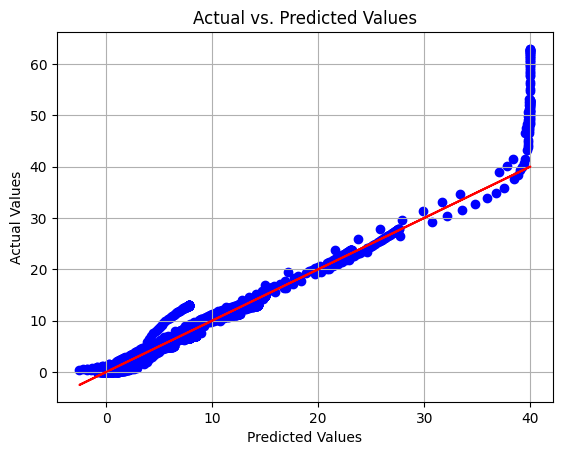

MSE for 2 layer model test set: 7.75744008604612
16.21129326047359


In [12]:
pred_train4tanh = model4tanh.predict(X_train)
plotpred(pred_train4tanh, y_train)
mse4ltanh = np.mean((y_train - pred_train4tanh) ** 2)
print("MSE for 2 layer model test set:", mse4ltanh)
print(accuracy(pred_train4tanh, y_train))

22/22 [==============================] - 0s 8ms/step


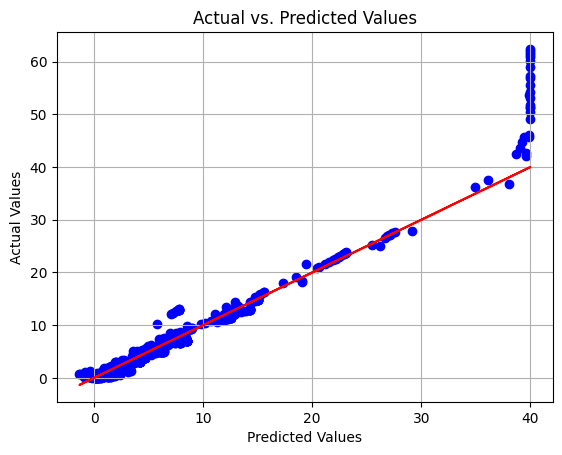

MSE for 2 layer model test set: 8.561739318530874
14.847161572052403


In [13]:
pred_test4tanh = model4tanh.predict(X_test)
plotpred(pred_test4tanh, y_test)
mse4ltanht = np.mean((y_test - pred_test4tanh) ** 2)
print("MSE for 2 layer model test set:", mse4ltanht)
print(accuracy(pred_test4tanh, y_test))

## 7 layer tanh model

In [14]:
# Build the neural network model
model7tanh = keras.Sequential([
    layers.Dense(16, activation='tanh', input_shape=(3,)),
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model7tanh.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model7tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

Epoch 1/100
86/86 [==============================] - 6s 5ms/step - loss: 120.7481
Epoch 2/100
86/86 [==============================] - 1s 8ms/step - loss: 93.4841
Epoch 3/100
86/86 [==============================] - 1s 8ms/step - loss: 83.0935
Epoch 4/100
86/86 [==============================] - 0s 5ms/step - loss: 76.3166
Epoch 5/100
86/86 [==============================] - 1s 7ms/step - loss: 70.8257
Epoch 6/100
86/86 [==============================] - 1s 8ms/step - loss: 65.9126
Epoch 7/100
86/86 [==============================] - 1s 8ms/step - loss: 61.1091
Epoch 8/100
86/86 [==============================] - 1s 10ms/step - loss: 56.5887
Epoch 9/100
86/86 [==============================] - 1s 9ms/step - loss: 53.1920
Epoch 10/100
86/86 [==============================] - 1s 10ms/step - loss: 50.0463
Epoch 11/100
86/86 [==============================] - 1s 11ms/step - loss: 46.9767
Epoch 12/100
86/86 [==============================] - 1s 14ms/step - loss: 44.1677
Epoch 13/100
86/86 [

86/86 [==============================] - 1s 11ms/step


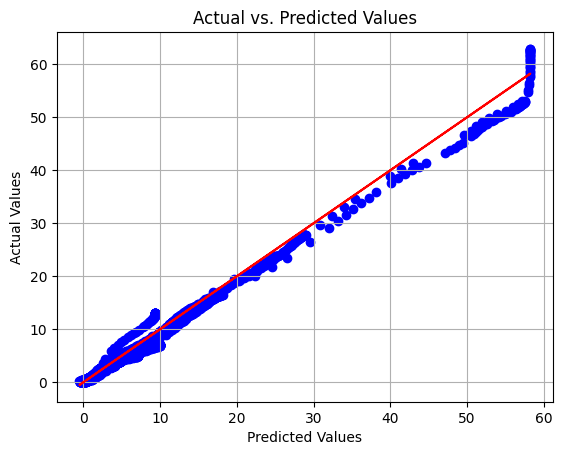

MSE for 2 layer model test set: 1.1480757957415153
24.8816029143898


In [15]:
pred_train7tanh = model7tanh.predict(X_train)
plotpred(pred_train7tanh, y_train)
mse7ltanh = np.mean((y_train - pred_train7tanh) ** 2)
print("MSE for 2 layer model test set:", mse7ltanh)
print(accuracy(pred_train7tanh, y_train))

22/22 [==============================] - 0s 6ms/step


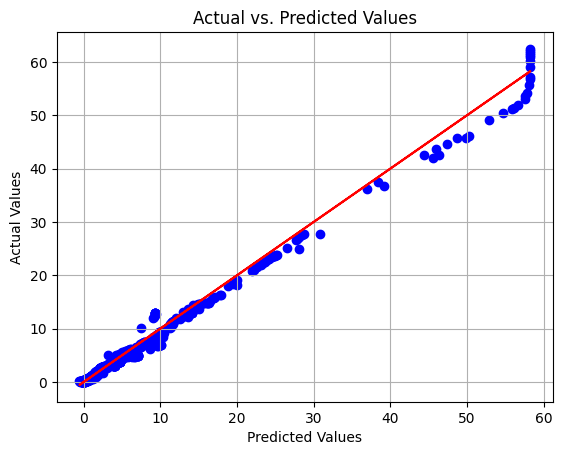

MSE for 2 layer model test set: 1.1914808082231225
23.726346433770015


In [16]:
pred_test7tanh = model7tanh.predict(X_test)
plotpred(pred_test7tanh, y_test)
mse7ltanht = np.mean((y_test - pred_test7tanh) ** 2)
print("MSE for 2 layer model test set:", mse7ltanht)
print(accuracy(pred_test7tanh, y_test))

## 16 Layer tanh

In [4]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(hidden_layers=1, hidden_units=24, activation='tanh'):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(3,)))

    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(hidden_units, activation=activation))

    model.add(layers.Dense(1))  # Linear activation for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a KerasRegressor wrapper for use in scikit-learn
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'hidden_layers': [16, 17, 18],
    'hidden_units': [12, 24, 36],
    'activation': ['tanh', 'relu']
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and corresponding mean test score
print("Best parameters found: ", grid_result.best_params_)
print("Best mean test score: {:.4f}".format(grid_result.best_score_))

/var/folders/9j/k1yxjf9n4zg9_s9pvsf64dbm0000gq/T/ipykernel_2942/3254204053.py:34: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)
2023-12-10 08:02:30.824271: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Best parameters found:  {'activation': 'relu', 'hidden_layers': 18, 'hidden_units': 36}
Best mean test score: -0.1905


In [5]:
model18tanh = keras.Sequential([
    layers.Dense(36, activation='tanh', input_shape=(3,)),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(36, activation='tanh'),
    layers.Dense(1)  # Linear activation for regression
])
# Compile the model
model18tanh.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model18tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

Epoch 1/100
86/86 [==============================] - 32s 22ms/step - loss: 113.5653
Epoch 2/100
86/86 [==============================] - 2s 20ms/step - loss: 93.2828
Epoch 3/100
86/86 [==============================] - 2s 24ms/step - loss: 71.2299
Epoch 4/100
86/86 [==============================] - 2s 19ms/step - loss: 60.5344
Epoch 5/100
86/86 [==============================] - 2s 19ms/step - loss: 51.0719
Epoch 6/100
86/86 [==============================] - 2s 20ms/step - loss: 45.5257
Epoch 7/100
86/86 [==============================] - 2s 20ms/step - loss: 37.9413
Epoch 8/100
86/86 [==============================] - 2s 20ms/step - loss: 33.1752
Epoch 9/100
86/86 [==============================] - 2s 20ms/step - loss: 29.5152
Epoch 10/100
86/86 [==============================] - 2s 18ms/step - loss: 26.5693
Epoch 11/100
86/86 [==============================] - 2s 19ms/step - loss: 23.3605
Epoch 12/100
86/86 [==============================] - 1s 17ms/step - loss: 21.3722
Epoch 13/10

86/86 [==============================] - 3s 7ms/step


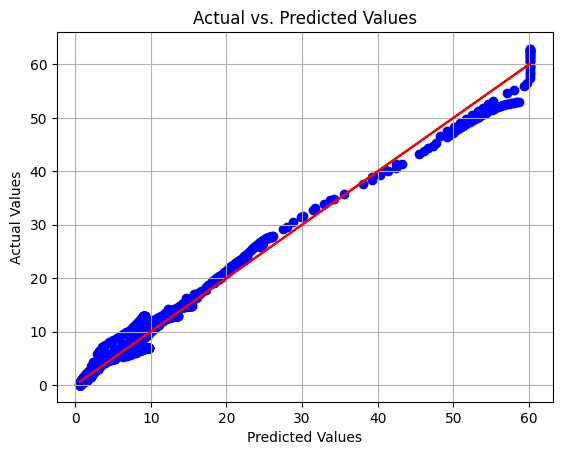

MSE for 2 layer model test set: 0.9332606320385818
25.573770491803277


In [6]:
pred_train18tanh = model18tanh.predict(X_train)
plotpred(pred_train18tanh, y_train)
mse18ltanh = np.mean((y_train - pred_train18tanh) ** 2)
print("MSE for 2 layer model test set:", mse18ltanh)
print(accuracy(pred_train18tanh, y_train))

In [8]:
print("Predictions in margin of 10%: ",accuracy(pred_train18tanh, y_train, 0.1))

Predictions in margin of 10%:  44.408014571949


22/22 [==============================] - 0s 4ms/step


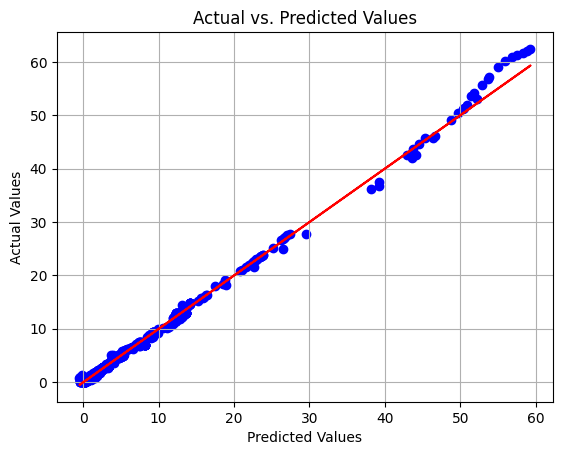

MSE for 2 layer model test set: 0.35806999109076004
42.94032023289665


In [20]:
pred_test18tanh = model18tanh.predict(X_test)
plotpred(pred_test18tanh, y_test)
mse18ltanht = np.mean((y_test - pred_test18tanh) ** 2)
print("MSE for 2 layer model test set:", mse18ltanht)
print(accuracy(pred_test18tanh, y_test))

In [25]:
print("Predictions in margin of 10%: ",accuracy(pred_test16tanh, y_test, 0.3))

Predictions in margin of 10%:  87.33624454148472


## 30 layer

In [31]:
# Build the neural network model
model30tanh = keras.Sequential([
    layers.Dense(60, activation='tanh', input_shape=(3,)),
    layers.Dense(55, activation='tanh'),
    layers.Dense(50, activation='tanh'),
    layers.Dense(45, activation='tanh'),
    layers.Dense(40, activation='tanh'),
    layers.Dense(35, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(20, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(30, activation='tanh'),
    layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model30tanh.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model30tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

Epoch 1/100
86/86 [==============================] - 32s 18ms/step - loss: 114.5392
Epoch 2/100
86/86 [==============================] - 1s 12ms/step - loss: 109.8527
Epoch 3/100
86/86 [==============================] - 1s 15ms/step - loss: 109.8432
Epoch 4/100
86/86 [==============================] - 1s 15ms/step - loss: 110.7860
Epoch 5/100
86/86 [==============================] - 1s 17ms/step - loss: 109.8754
Epoch 6/100
86/86 [==============================] - 1s 8ms/step - loss: 109.8631
Epoch 7/100
86/86 [==============================] - 1s 12ms/step - loss: 109.9492
Epoch 8/100
86/86 [==============================] - 1s 14ms/step - loss: 109.8696
Epoch 9/100
86/86 [==============================] - 1s 12ms/step - loss: 109.8368
Epoch 10/100
86/86 [==============================] - 1s 16ms/step - loss: 109.8210
Epoch 11/100
86/86 [==============================] - 2s 18ms/step - loss: 109.7952
Epoch 12/100
86/86 [==============================] - 2s 17ms/step - loss: 109.8509
E

86/86 [==============================] - 4s 11ms/step


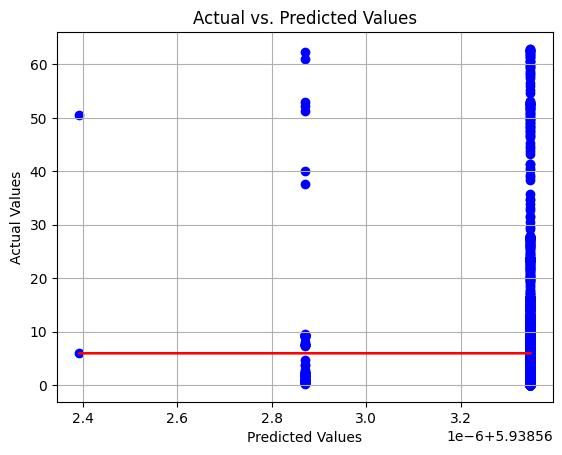

MSE for 2 layer model test set: 109.77731623060197
0.6193078324225865


In [33]:
pred_train30tanh = model30tanh.predict(X_train)
plotpred(pred_train30tanh, y_train)
mse30ltanh = np.mean((y_train - pred_train30tanh) ** 2)
print("MSE for 2 layer model test set:", mse30ltanh)
print(accuracy(pred_train30tanh, y_train))

 1/22 [>.............................] - ETA: 4s

22/22 [==============================] - 0s 13ms/step


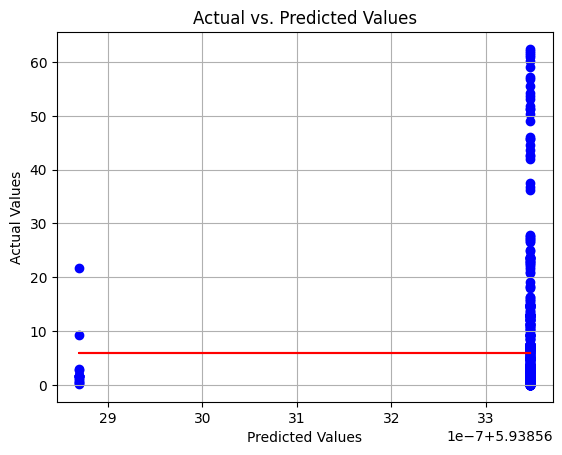

MSE for 2 layer model test set: 121.5187468115352
1.3100436681222707


In [35]:
pred_test30tanh = model30tanh.predict(X_test)
plotpred(pred_test30tanh, y_test)
mse30ltanht = np.mean((y_test - pred_test30tanh) ** 2)
print("MSE for 2 layer model test set:", mse30ltanht)
print(accuracy(pred_test30tanh, y_test))